<img src= "https://www.ufpb.br/sites/all/themes/ufquatorze/logo.png" alt="ufpb" width="100"/>![UFPB]()|UNIVERSIDADE FEDERAL DA PARAÍBA<br/>CENTRO DE ENERGIAS ALTERNATIVAS E RENOVÁVEIS|<img src= "https://yt3.ggpht.com/a-/AAuE7mDIwJX3pJsZwG4hhHkAl-uhZRMLaktfkdU08A=s288-mo-c-c0xffffffff-rj-k-no" alt="cear" width="200"/>
-|-|-:

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 2

Esse notebook tem por objetivo introduzir a biblioteca OpenCV. Esse biblioteca facilitara a manipulação e processamento de imagens e vídeos. Além disso, nesse notebook serão explorados:

- Leitura de imagens
- Conversão em espaços de cores

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas.

In [1]:
import numpy as np

#Importação da biblioteca OpenCV
import cv2

#Importação da biblioteca Matplotlib para exibição das imagens e gráficos 
import matplotlib as mpl
from matplotlib import pyplot as plt
#Para melhor uso do matplotlib no notebook
%matplotlib inline  
mpl.rcParams['figure.figsize'] = (10.0, 10.0) #define as dimensões padrões da janela do MatplotLib

#### Leitura e exibição de uma imagem

No exemplo a seguir será exibida a imagem ../../Data/1.png, para isso utilizou-se a função do OpenCV *imread()* e a função do Matplotlib *imshow()*.


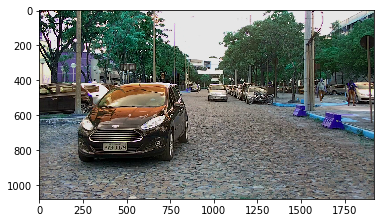

In [3]:
#A função imread() faz a leitura de uma imagem convertendo-a para um valor de matriz OpenCV
img_1 = cv2.imread('../Data/1.png')

#A função imshow() permite exibir uma imagem escolhendo-se o mapa de cor apropriado 
plt.imshow(img_1,cmap='gray')

#### Conversão em espaço de cores

A representação mais tradicional de uma imagem em PDI é como uma matriz 2D. Essa é uma representação de imagens monocromáticas, cujos valores dos elementos simbolizam o brilho da imagem, em uma escala que vai do **preto ao branco**, passando por diversos tons de cinza. Os valores dos elementos são limitados e podem variar de um *Lmin* a um *Lmax*, em que a escala mais comum e utilizada por padrão no OpenCV é de **0 a 255** (Pedrini e Schwartz, 2008).

As cores em PDI (Processamento Digital de Imagens) podem ser entendidas como uma especificação de um sistema de coordenadas tridimensionais e um subespaço dentro desse sistema onde cada cor é expressa por um único ponto. Os modelos mais utilizados no PDI são o RGB, o YIQ e o HSI, incluindo suas variações (GONZALEZ e WOODS, 2006). Nesses modelos a imagem é entendida como a junção de três matrizes 2D uma para cada canal (Exemplo: No RGB, uma para o canal RED, outra para o GREEN e outra para o BLUE).

O OpenCV faz uso da função cvtColor() para realizar a conversão entre espaços de cores e desses espaços para tons de cinza.

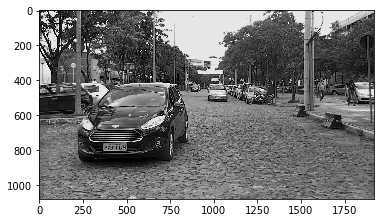

In [4]:
# cvtColor() recebe como parametros a imagem e a conversão a ser realizada
img1_gray = cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)

plt.imshow(img1_gray,cmap='gray')

#### Leitura e Conversão de múltiplas imagens

Para isso faremos uso de um laço *for* e a função *str()* para converte valores númericos em *string*. Entretanto, existem diversas formas de se fazer isso, por exemplo, com uso da biblioteca *glob*/*glob2* ou ainda utilizando a biblioteca de manipulação de caminhos *os* do Python.   

*Obs: Nesse guia só serão utilizadas as 20 imagens que o banco de dados disponibiliza para exibição.*

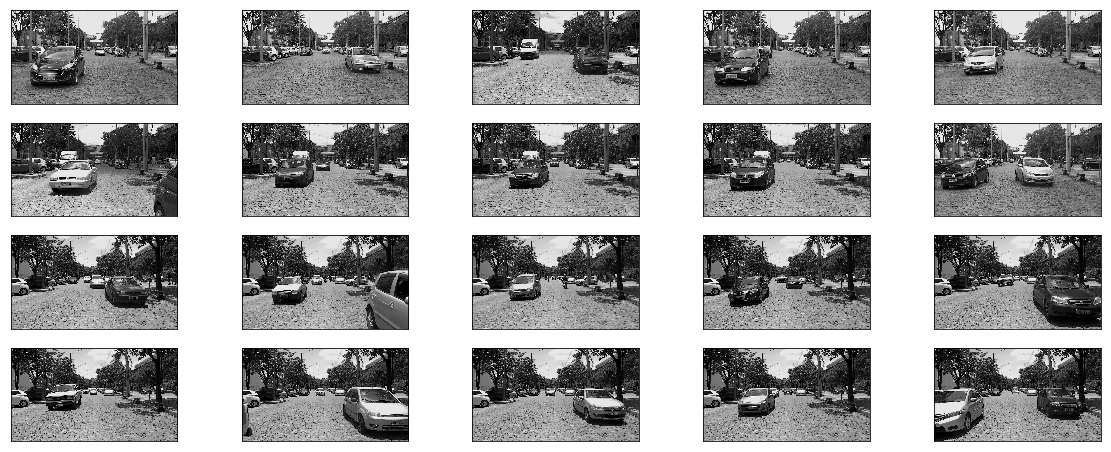

In [6]:
from os import listdir

path = '../Data/' # caminho para a pasta das imagens
img_color = [] # vetor de imagens coloridas
img = [] # vetor de imagens em tons de cinza

number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos da pasta

plt.figure(figsize=[20,10]) #define a existencia de uma figura e define o seu tamanho

#A cada iteração uma imagem é carregada e convertida para tons de cinza, ao passo que é armazenada nos vetores acima
for i in range(0,number_of_files): 
    img_color.append(cv2.imread(path + str(i+1) + '.png'))
    img.append(cv2.cvtColor(img_color[i],cv2.COLOR_RGB2GRAY))
    
    #Exibe as imagens
    plt.subplot(1+number_of_files/5,5,i+1)
    plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
    #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.

### Referências

- PEDRINI, H.; SCHWARTZ, W. R. **Análise de Imagens Digitais: Princípios, Algoritmos e Aplicações.** São Paulo: THOMSON Learning, 2008. 
- GONZALEZ, R. C.; WOODS, R. E. **Digital Image Processing (3rd Edition).** Upper Saddle River, NJ, USA: Prentice-Hall, Inc., 2006. 
- [Gabriel Resende Gonçalves, Sirlene Pio Gomes da Silva, David Menotti, William Robson Schwartz (2016): Benchmark for License Plate Character Segmentation. In: Journal of Electronic Imaging, 25 (5), pp. 1-5, 2016, ISBN: 1017-9909.](http://www.ssig.dcc.ufmg.br/wp-content/uploads/2016/11/JEI-2016-Benchmark.pdf) 